In [717]:
import numpy as np
import matplotlib.pyplot as plt

In [718]:
# Reward parameters
initial_stake_percentage = 25
stake_target_percentage = 50
min_apr_percentage = 2.5
max_apr_percentage = 75
initial_apr_percentage = (max_apr_percentage + min_apr_percentage)

# Controller parameters
Kp = 0
Ki = 1
Kd = 1

# Staker behavior parameters
real_apr_percentage = 10
reward_reactivity = 1

In [719]:
# State variables
current_stake_percentage = initial_stake_percentage
current_apr_percentage = initial_apr_percentage
error_t_minus_one = 0
error_t_minus_two = 0

In [720]:
sim_length = 100
stake_percentages = []
apr_percentages = []
for ind in range(sim_length):
    # A simple simulation of staker behavior
    current_stake_percentage = current_stake_percentage + (current_apr_percentage - real_apr_percentage) * np.random.rand() * reward_reactivity
    current_stake_percentage = max(0, min(current_stake_percentage, 100))

    stake_percentages.append(current_stake_percentage)
    apr_percentages.append(current_apr_percentage)

    error = stake_target_percentage - current_stake_percentage
    # http://www.irphouse.com/ijec/ijecv2n1_05.pdf Eq. 6
    current_apr_percentage = current_apr_percentage + Kp * (error - error_t_minus_one) + Ki * error + Kd * (error - 2 * error_t_minus_one + error_t_minus_two)
    current_apr_percentage = max(min_apr_percentage, min(current_apr_percentage, max_apr_percentage))
    error_t_minus_two = error_t_minus_one
    error_t_minus_one = error

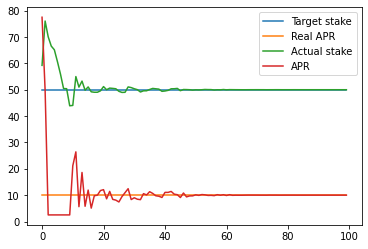

In [721]:
plt.plot([stake_target_percentage] * sim_length, label = 'Target stake')
plt.plot([real_apr_percentage] * sim_length, label = 'Real APR')
plt.plot(stake_percentages, label = 'Actual stake')
plt.plot(apr_percentages, label = 'APR')
plt.legend()